<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Pandas for Exploratory Data Analysis

_Author: Kevin Markham (Washington, D.C.)_

---

## Learning Objectives

- Define what Pandas is and how it relates to data science.
- Manipulate Pandas `DataFrames` and `Series`.
- Filter and sort data using Pandas.
- Manipulate `DataFrame` columns.
- Know how to handle null and missing values.

## Lesson Guide

- [What Is Pandas?](#pandas)
- [Reading Files, Selecting Columns, and Summarizing](#reading-files)
    - [Exercise 1](#exercise-one)
    
    
- [Filtering and Sorting](#filtering-and-sorting)
    - [Exercise 2](#exercise-two)
    
    
- [Renaming, Adding, and Removing Columns](#columns)
- [Handling Missing Values](#missing-values)
    - [Exercise 3](#exercise-three)
    
    
- [Split-Apply-Combine](#split-apply-combine)
    - [Exercise 4](#exercise-four)
    
    
- [Selecting Multiple Columns and Filtering Rows](#multiple-columns)
- [Joining (Merging) DataFrames](#joining-dataframes)
- [OPTIONAL: Other Commonly Used Features](#other-features)
- [OPTIONAL: Other Less Used Features of Pandas](#uncommon-features)
- [Summary](#summary)

<a id="pandas"></a>

## What Is Pandas?

- **Objective:** Define what Pandas is and how it relates to data science.

Pandas is a Python library that primarily adds two new datatypes to Python: `DataFrame` and `Series`.

- A `Series` is a sequence of items, where each item has a unique label (called an `index`).
- A `DataFrame` is a table of data. Each row has a unique label (the `row index`), and each column has a unique label (the `column index`).
- Note that each column in a `DataFrame` can be considered a `Series` (`Series` index).

> Behind the scenes, these datatypes use the NumPy ("Numerical Python") library. NumPy primarily adds the `ndarray` (n-dimensional array) datatype to Pandas. An `ndarray` is similar to a Python list — it stores ordered data. However, it differs in three respects:
> - Each element has the same datatype (typically fixed-size, e.g., a 32-bit integer).
> - Elements are stored contiguously (immediately after each other) in memory for fast retrieval.
> - The total size of an `ndarray` is fixed.

> Storing `Series` and `DataFrame` data in `ndarray`s makes Pandas faster and uses less memory than standard Python datatypes. Many libraries (such as scikit-learn) accept `ndarray`s as input rather than Pandas datatypes, so we will frequently convert between them.


### Using Pandas

Pandas is frequently used in data science because it offers a large set of commonly used functions, is relatively fast, and has a large community. Because many data science libraries also use NumPy to manipulate data, you can easily transfer data between libraries (as we will often do in this class!).

Pandas is a large library that typically takes a lot of practice to learn. It heavily overrides Python operators, resulting in odd-looking syntax. For example, given a `DataFrame` called `cars` which contains a column `mpg`, we might want to view all cars with mpg over 35. To do this, we might write: `cars[cars['mpg'] > 35]`. In standard Python, this would most likely give a syntax error. 

Pandas also highly favors certain patterns of use. For example, looping through a `DataFrame` row by row is highly discouraged. Instead, Pandas favors using **vectorized functions** that operate column by column. (This is because each column is stored separately as an `ndarray`, and NumPy is optimized for operating on `ndarray`s.)

Do not be discouraged if Pandas feels overwhelming. Gradually, as you use it, you will become familiar with which methods to use and the "Pandas way" of thinking about and manipulating data.

### Class Methods and Attributes

Pandas `DataFrame`s are Pandas class objects and therefore come with attributes and methods. To access these, follow the variable name with a dot. For example, given a `DataFrame` called `users`:

```
- users.index       # accesses the `index` attribute -- note there are no parentheses. attributes are not callable
- users.head()      # calls the `head` method (since there are open/closed parentheses)
- users.head(10)    # calls the `head` method with parameter `10`, indicating the first 10 rows. this is the same as:
- users.head(n=10)  # calls the `head` method, setting the named parameter `n` to have a value of `10`.
```

We know that the `head` method accepts one parameter with an optional name of `n` because it is in the documentation for that method. Let's see how to view the documentation next.

### Viewing Documentation

There are a few ways to find more information about a method.

**Method 1:** In Jupyter, you can quickly view documentation for a method by following the method name by a `?`, as follows:

```
users.head?
```

> ```
Signature: users.head(n=5)
Docstring: Returns first n rows
```

Notice that we would normally invoke this method by calling `users.head(5)`. One quirk of IPython is that the `?` symbol must be the last character in the cell. Otherwise, it might not work.

> The `?` is a shortcut for the built-in Python function `help`, which returns the method's docstring. For example:
> ```
help(users.head)
```

**Method 2:** You can also search online for the phrase "`DataFrame head`", since you are calling the method `head` on the `users` object, which happens to be a `DataFrame`. (`type(users) => pandas.DataFrame`)

You can alternatively search online for `pandas head`, but be careful! `DataFrame` and `Series` both have a `head` method, so make sure you view the documentation for the correct one since they might be called differently. You will know you are looking at the correct documentation page because it will say `DataFrame.head` at the top, instead of `Series.head`.

## Pandas

To [import a library](https://docs.python.org/3/reference/import.html), we write `import` and the library name. For Pandas, is it common to name the library `pd` so that when we reference a function from the Pandas library, we only write `pd` to reference the aliased [namespace](https://docs.python.org/3/tutorial/classes.html#python-scopes-and-namespaces) -- not `pandas`.

In [59]:
# Load Pandas into Python
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

<a id="reading-files"></a>
### Reading Files, Selecting Columns, and Summarizing

Pandas dramatically simplifies the process of reading in data. When we say "reading in data," we mean loading a file into our machine's memory.

When you have a CSV, for example, and then you double-click to open it in Microsoft Excel, the open file is "read into memory." You can now manipulate the CSV.

When we read data into memory in Python, we are creating an object. We will soon explore this object. _(And, as an aside, when we have a file that is greater than the size of our computer's memory, this is approaching "Big Data.")_

A [delimiter](https://en.wikipedia.org/wiki/Delimiter-separated_values) is a character that separates fields (columns) in the imported file. In this case, we have a pipe character as the delimiter for our columns, so we will be using `sep='|'` to tell pandas to 'cut' the columns every time it sees a pipe character in the file.

In [61]:
users = pd.read_table('./data/user.tbl', sep='|')

*Documentation Pause*

How did we know how to use `pd.read_table`? Let's take a look at the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_table.html). Note the first argument required (`filepath`).
> Take a moment to dissect other arguments and options when reading in data.

**Examine the users data.**

In [62]:
type(users)             # DataFrame

pandas.core.frame.DataFrame

In [4]:
users.head()            # Print the first five rows.

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Notice that `.head()` is a method (denoted by parantheses), so it takes arguments.

In [5]:
users.head(10)          # Print the first 10 rows.

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [7]:
users.tail(30)            # Print the last five rows and last 30 rows.

,user_id,age,gender,occupation,zip_code
913,914,44,F,other,08105
914,915,50,M,entertainment,60614
915,916,27,M,engineer,N2L5N
916,917,22,F,student,20006
917,918,40,M,scientist,70116
918,919,25,M,other,14216
919,920,30,F,artist,90008
920,921,20,F,student,98801
921,922,29,F,administrator,21114
922,923,21,M,student,E2E3R


In [8]:
 # The row index (aka "the row labels" — in this case integers)
users.index            

RangeIndex(start=0, stop=943, step=1)

In [9]:
# Column names (which is "an index")
users.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [9]:
# Datatypes of each column — each column is stored as an ndarray, which has a datatype
users.dtypes

user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [10]:
# Number of rows and columns
users.shape

(943, 5)

In [10]:
# All values as a NumPy array
users.values

array([[1, 24, 'M', 'technician', '85711'],
       [2, 53, 'F', 'other', '94043'],
       [3, 23, 'M', 'writer', '32067'],
       ...,
       [941, 20, 'M', 'student', '97229'],
       [942, 48, 'F', 'librarian', '78209'],
       [943, 22, 'M', 'student', '77841']], dtype=object)

In [11]:
# Concise summary (including memory usage) — useful to quickly see if nulls exist
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


** Select or index data.**<br>
Pandas `DataFrame`s have structural similarities with Python-style lists and dictionaries.  
In the example below, we select a column of data using the name of the column in a similar manner to how we select a dictionary value with the dictionary key.

In [13]:
# Select a column — returns a Pandas Series (essentially an ndarray with an index)
users['gender']

0      M
1      F
2      M
3      M
4      F
      ..
938    F
939    M
940    M
941    F
942    M
Name: gender, Length: 943, dtype: object

In [14]:
# DataFrame columns are Pandas Series.
type(users['gender'])

pandas.core.series.Series

In [15]:
# Select one column using the DataFrame attribute.
users.gender

# While a useful shorthand, these attributes only exist
# if the column name has no punctuations or spaces.

0      M
1      F
2      M
3      M
4      F
      ..
938    F
939    M
940    M
941    F
942    M
Name: gender, Length: 943, dtype: object

**Summarize (describe) the data.**<br>
Pandas has a bunch of built-in methods to quickly summarize your data and provide you with a quick general understanding.

In [12]:
# Describe all numeric columns.
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [17]:
# Describe all object columns (can include multiple types).
users.describe(include=['object'])

,gender,occupation,zip_code
count,943,943,943
unique,2,21,795
top,M,student,55414
freq,670,196,9


In [18]:
# Describe all columns, including non-numeric.
users.describe(include='all')

,user_id,age,gender,occupation,zip_code
count,943.000000,943.000000,943,943,943
unique,NaN,NaN,2,21,795
top,NaN,NaN,M,student,55414
freq,NaN,NaN,670,196,9
mean,472.000000,34.051962,NaN,NaN,NaN
std,272.364951,12.192740,NaN,NaN,NaN
min,1.000000,7.000000,NaN,NaN,NaN
25%,236.500000,25.000000,NaN,NaN,NaN
50%,472.000000,31.000000,NaN,NaN,NaN
75%,707.500000,43.000000,NaN,NaN,NaN


In [19]:
# Describe a single column — recall that "users.gender" refers to a Series.
users.gender.describe()

count     943
unique      2
top         M
freq      670
Name: gender, dtype: object

In [20]:
# Calculate the mean of the ages.
users.age.mean()

34.05196182396607

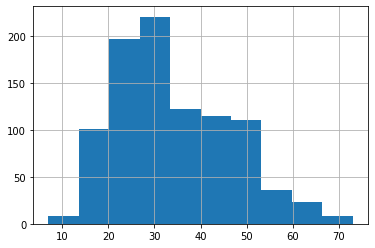

In [21]:
# Draw a histogram of a column (the distribution of ages).
users.age.hist();

**Count the number of occurrences of each value.**

In [22]:
users.gender.value_counts()     # Most useful for categorical variables

M    670
F    273
Name: gender, dtype: int64

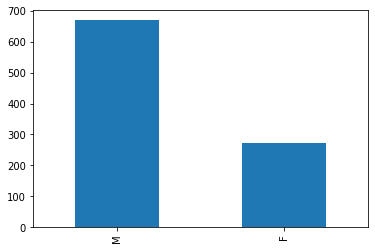

In [23]:
users.gender.value_counts().plot(kind='bar')     # Quick plot by category

In [60]:
# Can also be used with numeric variables
#   Try .sort_index() to sort by indices or .sort_values() to sort by counts.
users.age.value_counts().sort_index()

7     1
10    1
11    1
13    5
14    3
     ..
66    1
68    2
69    2
70    3
73    1
Name: age, Length: 61, dtype: int64

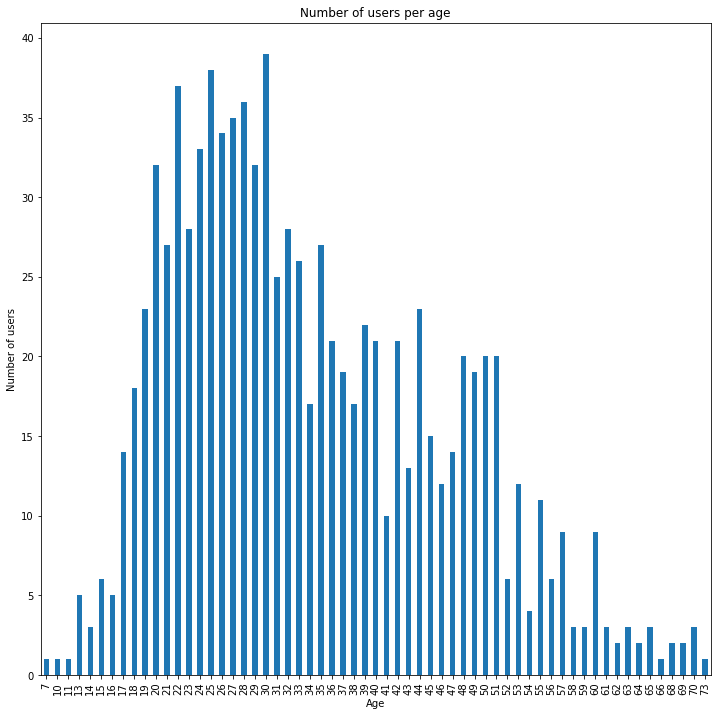

In [24]:
users.age.value_counts().sort_index().plot(kind='bar', figsize=(12,12));     # Bigger plot by increasing age
plt.xlabel('Age');
plt.ylabel('Number of users');
plt.title('Number of users per age');

<a id="exercise-one"></a>
### Exercise 1

In [87]:
# Read drinks.csv into a DataFrame called "drinks".
import pandas as pd
drinks = pd.read_csv('data/drinks.csv')

In [31]:
# Print the head and the tail

drinks.head()
drinks.tail()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF
192,Zimbabwe,64,18,4,4.7,AF


In [37]:
# Examine the default index, datatypes, and shape.
drinks.shape
drinks.dtypes
drinks.columns


Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [40]:
# Print the beer_servings Series.
drinks["beer_servings"]


0        0
1       89
2       25
3      245
4      217
      ... 
188    333
189    111
190      6
191     32
192     64
Name: beer_servings, Length: 193, dtype: int64

In [44]:
# Calculate the average beer_servings for the entire data set.

drinks.describe()


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [70]:
# Count the number of occurrences of each "continent" value and see if it looks correct.
drinks.describe(include="object")

,country,continent
count,193,170
unique,193,5
top,Zimbabwe,AF
freq,1,53


<a id="filtering-and-sorting"></a>
### Filtering and Sorting
- **Objective:** Filter and sort data using Pandas.

Filtering and sorting are key processes that allow us to drill into the 'nitty gritty' and cross sections of our dataset.

To filter, we use a process called **Boolean Filtering**, wherein we define a Boolean condition, and use that Boolean condition to filer on our DataFrame.

**Logical filtering: Only show users with age < 20.**

In [47]:
# Create a Series of Booleans…
# In Pandas, this comparison is performed element-wise on each row of data.
young_bool = users.age < 20
young_bool

0      False
1      False
2      False
3      False
4      False
       ...  
938    False
939    False
940    False
941    False
942    False
Name: age, Length: 943, dtype: bool

In [33]:
# …and use that Series to filter rows.
# In Pandas, indexing a DataFrame by a Series of Booleans only selects rows that are True in the Boolean.
users[young_bool]

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402
...,...,...,...,...,...
871,872,19,F,student,74078
879,880,13,M,student,83702
886,887,14,F,student,27249
903,904,17,F,student,61073


In [48]:
# Or, combine into a single step.
users[users.age < 20]

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402
...,...,...,...,...,...
871,872,19,F,student,74078
879,880,13,M,student,83702
886,887,14,F,student,27249
903,904,17,F,student,61073


In [49]:
# Important: This creates a view of the original DataFrame, not a new DataFrame.
# If you alter this view (e.g., by storing it in a variable and altering that)
# You will alter only the slice of the DataFrame and not the actual DataFrame itself
# Here, notice that Pandas gives you a SettingWithCopyWarning to alert you of this.

# It is best practice to use .loc and .iloc instead of the syntax below

users_under20 = users[users.age < 20]   # To resolve this warning, copy the `DataFrame` using `.copy()`.
users_under20['newcolumn'] = 0

<ipython-input-49-00a9183576a8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_under20['newcolumn'] = 0


In [36]:
# Select one column from the filtered results.
users[users.age < 20].occupation

29      student
35      student
51      student
56         none
66      student
         ...   
871     student
879     student
886     student
903     student
924    salesman
Name: occupation, Length: 77, dtype: object

In [37]:
# value_counts of resulting Series
users[users.age < 20].occupation.value_counts()

student          64
other             4
none              3
writer            2
entertainment     2
salesman          1
artist            1
Name: occupation, dtype: int64

**Logical filtering with multiple conditions**

Here, we will filter on _multiple conditions_. 

The format for multiple conditions is:

`df[ (df['col1'] == value1) & (df['col2'] == value2) ]`

Or, more simply:

`df[ (CONDITION 1) & (CONDITION 2) ]`

Which eventually may evaluate to something like:

`df[ True & False ]`

...on a row-by-row basis. If the end result is `False`, the row is omitted.

_Don't forget parentheses in your conditions!_ This is a common mistake.

In [50]:
# Ampersand for `AND` condition. (This is a "bitwise" `AND`.)
# Important: You MUST put parentheses around each expression because `&` has a higher precedence than `<`.
users[(users.age < 20) & (users.gender=='M')]

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
56,57,16,M,none,84010
66,67,17,M,student,60402
67,68,19,M,student,22904
100,101,15,M,student,05146
109,110,19,M,student,77840
141,142,13,M,other,48118
178,179,15,M,entertainment,20755
220,221,19,M,student,20685
245,246,19,M,student,28734


In [39]:
# Pipe for `OR` condition. (This is a "bitwise" `OR`.)
# Important: You MUST put parentheses around each expression because `|` has a higher precedence than `<`.
users[(users.age < 20) | (users.age > 60)]

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402
...,...,...,...,...,...
879,880,13,M,student,83702
886,887,14,F,student,27249
903,904,17,F,student,61073
924,925,18,F,salesman,49036


In [40]:
# Preferred alternative to multiple `OR` conditions
users[users.occupation.isin(['doctor', 'lawyer'])]

,user_id,age,gender,occupation,zip_code
9,10,53,M,lawyer,90703
124,125,30,M,lawyer,22202
125,126,28,F,lawyer,20015
137,138,46,M,doctor,53211
160,161,50,M,lawyer,55104
204,205,47,M,lawyer,06371
250,251,28,M,doctor,85032
298,299,29,M,doctor,63108
338,339,35,M,lawyer,37901
364,365,29,M,lawyer,20009


**Sorting**

In [52]:
# Sort a Series.
users.age.sort_values()

29      7
470    10
288    11
879    13
608    13
       ..
584    69
766    70
802    70
859    70
480    73
Name: age, Length: 943, dtype: int64

In [56]:
# Sort a DataFrame by a single column.
users.sort_values('age', ascending=True)

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
470,471,10,M,student,77459
288,289,11,M,none,94619
879,880,13,M,student,83702
608,609,13,F,student,55106
...,...,...,...,...,...
584,585,69,M,librarian,98501
766,767,70,M,engineer,00000
802,803,70,M,administrator,78212
859,860,70,F,retired,48322


In [43]:
# Use descending order instead.
users.sort_values('age', ascending=False)

,user_id,age,gender,occupation,zip_code
480,481,73,M,retired,37771
802,803,70,M,administrator,78212
766,767,70,M,engineer,00000
859,860,70,F,retired,48322
584,585,69,M,librarian,98501
...,...,...,...,...,...
879,880,13,M,student,83702
608,609,13,F,student,55106
288,289,11,M,none,94619
470,471,10,M,student,77459


In [44]:
# Sort by multiple columns.
users.sort_values(['occupation', 'age'])

,user_id,age,gender,occupation,zip_code
117,118,21,M,administrator,90210
179,180,22,F,administrator,60202
281,282,22,M,administrator,20057
316,317,22,M,administrator,13210
438,439,23,F,administrator,20817
...,...,...,...,...,...
547,548,51,M,writer,95468
369,370,52,M,writer,08534
391,392,52,M,writer,59801
557,558,56,F,writer,63132


<a id="exercise-two"></a>
### Exercise 2
Use the `drinks.csv` or `drinks` `DataFrame` from earlier to complete the following.

In [86]:
# Filter DataFrame to only include European countries.

#drinks[(continent=="EU")]
drinks[drinks.continent=="EU"]

NameError: name 'drinks' is not defined

In [78]:
# Filter DataFrame to only include European countries with wine_servings > 300.
drinks[(drinks.continent=="EU")&(drinks.wine_servings > 300)]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
3,Andorra,245,138,312,12.4,EU
61,France,127,151,370,11.8,EU
136,Portugal,194,67,339,11.0,EU


In [82]:
# Calculate the average beer_servings for all of Europe.
drinks[drinks.continent=="EU"].beer_servings.mean()


193.77777777777777

In [87]:
# Determine which 10 countries have the highest total_litres_of_pure_alcohol.
drinks.sort_values("total_litres_of_pure_alcohol",ascending = False).head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
15,Belarus,142,373,42,14.4,EU
98,Lithuania,343,244,56,12.9,EU
3,Andorra,245,138,312,12.4,EU
68,Grenada,199,438,28,11.9,NaN
45,Czech Republic,361,170,134,11.8,EU
61,France,127,151,370,11.8,EU
141,Russian Federation,247,326,73,11.5,AS
81,Ireland,313,118,165,11.4,EU
155,Slovakia,196,293,116,11.4,EU
99,Luxembourg,236,133,271,11.4,EU


<a id="columns"></a>
### Renaming, Adding, and Removing Columns

- **Objective:** Manipulate `DataFrame` columns.

In [90]:
# Print the column labels
print(drinks.columns)

Index(['country', 'beer', 'spirit_servings', 'wine',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')


In [91]:
# Rename one or more columns in the original DataFrame inplace
drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine'}, inplace=True)
# or assign your changes to your dataframe variable
drinks = drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine'})

In [92]:
# Replace all column names using a list of matching length.
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent'] 

# Replace during file reading (disables the header from the file).
drinks = pd.read_csv('data/drinks.csv', header=0, names=drink_cols)

In [93]:
# Replace after file has already been read into Python.
drinks.columns = drink_cols

**Easy Column Operations**<br>
Rather than having to reference indexes and create for loops to do column-wise operations, Pandas is smart and knows that when we add columns together we want to add the values in each row together.

In [94]:
# Add a new column as a function of existing columns.
drinks['servings'] = drinks.beer + drinks.spirit + drinks.wine
drinks['mL'] = drinks.liters * 1000

drinks.head()

,country,beer,spirit,wine,liters,continent,servings,mL
0,Afghanistan,0,0,0,0.0,AS,0,0.0
1,Albania,89,132,54,4.9,EU,275,4900.0
2,Algeria,25,0,14,0.7,AF,39,700.0
3,Andorra,245,138,312,12.4,EU,695,12400.0
4,Angola,217,57,45,5.9,AF,319,5900.0


**Removing Columns**

In [95]:
# axis=0 for rows, 1 for columns
drinks.drop('mL', axis=1)

,country,beer,spirit,wine,liters,continent,servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436
189,Vietnam,111,2,1,2.0,AS,114
190,Yemen,6,0,0,0.1,AS,6
191,Zambia,32,19,4,2.5,AF,55


In [55]:
# Drop multiple columns.
drinks.drop(['mL', 'servings'], axis=1)

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [56]:
# Drop on the original DataFrame rather than returning a new one.
drinks.drop(['mL', 'servings'], axis=1, inplace=True)

<a id="missing-values"></a>
### Handling Missing Values

- **Objective:** Know how to handle null and missing values.

Sometimes, values will be missing from the source data or as a byproduct of manipulations. It is very important to detect missing data. Missing data can:

- Make the entire row ineligible to be training data for a model.
- Hint at data-collection errors.
- Indicate improper conversion or manipulation.
- Actually not be missing — it sometimes means "zero," "false," "not applicable," or "entered an empty string."

For example, a `.csv` file might have a missing value in some data fields:

```
tool_name,material,cost
hammer,wood,8
chainsaw,,
wrench,metal,5
```

When this data is imported, "null" values will be stored in the second row (in the "material" and "cost" columns).

> In Pandas, a "null" value is either `None` or `np.NaN` (Not a Number). Many fixed-size numeric datatypes (such as integers) do not have a way of representing `np.NaN`. So, numeric columns will be promoted to floating-point datatypes that do support it. For example, when importing the `.csv` file above:

> - **For the second row:** `None` will be stored in the "material" column and `np.NaN` will be stored in the "cost" column. The entire "cost" column (stored as a single `ndarray`) must be stored as floating-point values to accommodate the `np.NaN`, even though an integer `8` is in the first row.

In [57]:
# Missing values are usually excluded in calculations by default.
drinks.continent.value_counts()              # Excludes missing values in the calculation

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

In [58]:
# Includes missing values
drinks.continent.value_counts(dropna=False)

AF     53
EU     45
AS     44
NaN    23
OC     16
SA     12
Name: continent, dtype: int64

In [59]:
# Find missing values in a Series.
# True if missing, False if not missing
drinks.continent.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
188    False
189    False
190    False
191    False
192    False
Name: continent, Length: 193, dtype: bool

In [60]:
# Count the missing values — sum() works because True is 1 and False is 0.
drinks.continent.isnull().sum()

23

In [61]:
# True if not missing, False if missing
drinks.continent.notnull()

0      True
1      True
2      True
3      True
4      True
       ... 
188    True
189    True
190    True
191    True
192    True
Name: continent, Length: 193, dtype: bool

In [62]:
# Only show rows where continent is not missing.
drinks[drinks.continent.notnull()]

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


**Understanding Pandas Axis**

In [63]:
# Sums "down" the 0 axis (rows) — so, we get the sums of each column
drinks.sum(axis=0)

country    AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
beer                                                   20489
spirit                                                 15632
wine                                                    9544
liters                                                 910.4
dtype: object

In [64]:
# axis=0 is the default.
drinks.sum()

country    AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
beer                                                   20489
spirit                                                 15632
wine                                                    9544
liters                                                 910.4
dtype: object

In [65]:
# Sums "across" the 1 axis (columns) — so, we get the sums of numeric values in the row (beer+spirit+wine+liters+…)
drinks.sum(axis=1)

0        0.0
1      279.9
2       39.7
3      707.4
4      324.9
       ...  
188    443.7
189    116.0
190      6.1
191     57.5
192     90.7
Length: 193, dtype: float64

**Find missing values in a `DataFrame`.**

In [66]:
# DataFrame of Booleans
drinks.isnull()

,country,beer,spirit,wine,liters,continent
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
188,False,False,False,False,False,False
189,False,False,False,False,False,False
190,False,False,False,False,False,False
191,False,False,False,False,False,False


country       0
beer          0
spirit        0
wine          0
liters        0
continent    23
dtype: int64


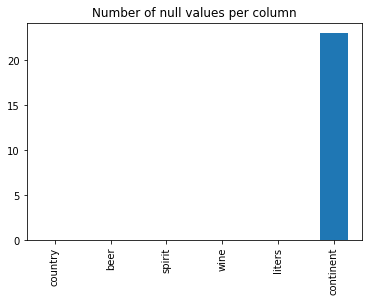

In [67]:
# Count the missing values in each column — remember by default, axis=0.
print((drinks.isnull().sum()))

drinks.isnull().sum().plot(kind='bar');         # visually
plt.title('Number of null values per column');

**Dropping Missing Values**

In [68]:
# Drop a row if ANY values are missing from any column — can be dangerous!
drinks.dropna)(

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [1]:
# Drop a row only if ALL values are missing.
drinks.dropna(how='all')

NameError: name 'drinks' is not defined

**Filling Missing Values**<br>
You may have noticed that the continent North America (NA) does not appear in the `continent` column. Pandas read in the original data and saw "NA", thought it was a missing value, and converted it to a `NaN`, missing value.

In [70]:
# Fill in missing values with "NA" — this is dangerous to do without manually verifying them!
drinks.continent.fillna(value='NA')

0      AS
1      EU
2      AF
3      EU
4      AF
       ..
188    SA
189    AS
190    AS
191    AF
192    AF
Name: continent, Length: 193, dtype: object

In [71]:
# Modifies "drinks" in-place
drinks.continent.fillna(value='NA', inplace=True)

In [72]:
# Turn off the missing value filter — this is a better approach!
drinks = pd.read_csv('data/drinks.csv', header=0, names=drink_cols, na_filter=False)

<a id="exercise-three"></a>
### Exercise 3

In [4]:
# Read ufo.csv into a DataFrame called "ufo".
ufo_data = 'data/ufo.csv'
ufo = pd.read_csv(ufo_data)

In [20]:
# Check the shape of the DataFrame.
ufo.describe()

,City,Colors Reported,Shape Reported,State,Time
count,80496,17034,72141,80543,80543
unique,13504,31,27,52,68901
top,Seattle,ORANGE,LIGHT,CA,7/4/2014 22:00
freq,646,5216,16332,10743,45


In [26]:
# What are the three most common colors reported?
ufos = ufo.rename(columns={"Colors Reported":"ColorsReported","Shape Reported":"ShapeReported"})

#drinks = drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine'})
ufos.ColorsReported.value_counts()

ORANGE                          5216
RED                             4809
GREEN                           1897
BLUE                            1855
YELLOW                           842
RED ORANGE                       486
RED GREEN                        469
RED BLUE                         445
RED GREEN BLUE                   166
GREEN BLUE                       147
RED YELLOW                       146
ORANGE YELLOW                    137
ORANGE GREEN                      66
ORANGE BLUE                       58
YELLOW GREEN                      53
RED YELLOW BLUE                   36
RED YELLOW GREEN                  35
RED ORANGE YELLOW                 32
YELLOW BLUE                       27
RED YELLOW GREEN BLUE             26
RED ORANGE BLUE                   21
ORANGE GREEN BLUE                 13
YELLOW GREEN BLUE                 13
RED ORANGE GREEN                  12
RED ORANGE GREEN BLUE              8
ORANGE YELLOW GREEN                5
RED ORANGE YELLOW GREEN            4
O

In [78]:
# Rename any columns with spaces so that they don't contain spaces.

ufos = ufo.rename(columns={"Colors Reported":"ColorsReported","Shape Reported":"ShapeReported"})

In [80]:
# For reports in VA, what's the most common city?
#ufos.set_index('City', inplace=True)
#ufos[ufos.State == "VA"].value_counts()
ufosfiltered = ufos[ufos.State == "VA"].drop(['Time', 'ShapeReported',"ColorsReported"], axis=1)
ufosfiltered.value_counts()


State
VA       1582
dtype: int64

In [41]:
# Print a DataFrame containing only reports from Arlington, VA.
ufos[(ufos.State == "VA") & (ufos.City == "Arlington")]

,City,ColorsReported,ShapeReported,State,Time
202,Arlington,GREEN,OVAL,VA,7/13/1952 21:00
6300,Arlington,NaN,CHEVRON,VA,5/5/1990 21:40
10278,Arlington,NaN,DISK,VA,5/27/1997 15:30
14527,Arlington,NaN,OTHER,VA,9/10/1999 21:41
17984,Arlington,RED,DISK,VA,11/19/2000 22:00
21201,Arlington,GREEN,FIREBALL,VA,1/7/2002 17:45
22633,Arlington,NaN,LIGHT,VA,7/26/2002 1:15
22780,Arlington,NaN,LIGHT,VA,8/7/2002 21:00
25066,Arlington,NaN,CIGAR,VA,6/1/2003 22:34
27398,Arlington,NaN,VARIOUS,VA,12/13/2003 2:00


In [42]:
# Count the number of missing values in each column.
print((ufos.isnull().sum()))

City                 47
ColorsReported    63509
ShapeReported      8402
State                 0
Time                  0
dtype: int64


In [45]:
# How many rows remain if you drop all rows with any missing values?
ufos.dropna().shape

(15510, 5)

<a id="multiple-columns"></a>
### Selecting Multiple Columns and Filtering Rows

In [46]:
# Select multiple columns — yet another overload of the DataFrame indexing operator!
my_cols = ['City', 'State']     # Create a list of column names...
ufo[my_cols]                    # ...and use that list to select columns.

# Or, combine into a single step (this is a Python list inside of the Python index operator!).
ufo[['City', 'State']]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
...,...,...
80538,Neligh,NE
80539,Uhrichsville,OH
80540,Tucson,AZ
80541,Orland park,IL


**Use `loc` to select columns by name.**

In [47]:
# "loc" locates the values from the first parameter (colon means "all rows"), and the column "City".
ufo.loc[:, 'City']  

0                      Ithaca
1                 Willingboro
2                     Holyoke
3                     Abilene
4        New York Worlds Fair
                 ...         
80538                  Neligh
80539            Uhrichsville
80540                  Tucson
80541             Orland park
80542                Loughman
Name: City, Length: 80543, dtype: object

In [48]:
# Select two columns.
ufo.loc[:, ['City', 'State']]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
...,...,...
80538,Neligh,NE
80539,Uhrichsville,OH
80540,Tucson,AZ
80541,Orland park,IL


In [49]:
# Select a range of columns — unlike Python ranges, Pandas index ranges INCLUDE the final column in the range.
ufo.loc[:, 'City':'State']

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY
...,...,...,...,...
80538,Neligh,NaN,CIRCLE,NE
80539,Uhrichsville,NaN,LIGHT,OH
80540,Tucson,RED BLUE,NaN,AZ
80541,Orland park,RED,LIGHT,IL


In [88]:
# "loc" can also filter rows by "name" (the index).
# Row 0, all columns
ufo.loc[0, :]

City                       Ithaca
Colors Reported               NaN
Shape Reported           TRIANGLE
State                          NY
Time               6/1/1930 22:00
Name: 0, dtype: object

In [54]:
# Rows 0/1/2, all columns
ufo.loc[0:2, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [55]:
# Rows 0/1/2, range of columns
ufo.loc[0:2, 'City':'State'] 

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


In [57]:
# All rows, columns in position 0/1/2/3
# Note here it is NOT INCLUDING 4 because this is an integer range, not a Pandas index range!
ufo.iloc[:, 0:4]

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY
...,...,...,...,...
80538,Neligh,NaN,CIRCLE,NE
80539,Uhrichsville,NaN,LIGHT,OH
80540,Tucson,RED BLUE,NaN,AZ
80541,Orland park,RED,LIGHT,IL


In [ ]:
# Rows in position 0/1/2, all columns
ufo.iloc[0:3, :] 

<a id="other-features"></a>
### OPTIONAL: Other Commonly Used Features

In [65]:
# Apply an arbitrary function to each value of a Pandas column, storing the result in a new column.
users['under30'] = users.age.apply(lambda age: age < 30)
users

,user_id,age,gender,occupation,zip_code,under30
0,1,24,M,technician,85711,True
1,2,53,F,other,94043,False
2,3,23,M,writer,32067,True
3,4,24,M,technician,43537,True
4,5,33,F,other,15213,False
...,...,...,...,...,...,...
938,939,26,F,student,33319,True
939,940,32,M,administrator,02215,False
940,941,20,M,student,97229,True
941,942,48,F,librarian,78209,False


In [67]:
# Apply an arbitrary function to each row of a DataFrame, storing the result in a new column.
#  (Remember that, by default, axis=0. Since we want to go row by row, we set axis=1.)
users['under30male'] = users.apply(lambda row: row.age < 30 and row.gender == 'M', axis=1)
users

,user_id,age,gender,occupation,zip_code,under30,under30male
0,1,24,M,technician,85711,True,True
1,2,53,F,other,94043,False,False
2,3,23,M,writer,32067,True,True
3,4,24,M,technician,43537,True,True
4,5,33,F,other,15213,False,False
...,...,...,...,...,...,...,...
938,939,26,F,student,33319,True,False
939,940,32,M,administrator,02215,False,False
940,941,20,M,student,97229,True,True
941,942,48,F,librarian,78209,False,False


In [69]:
# Map existing values to a different set of values.
users['is_male'] = users.gender.map({'F':0, 'M':1})
users

,user_id,age,gender,occupation,zip_code,under30,under30male,is_male
0,1,24,M,technician,85711,True,True,1
1,2,53,F,other,94043,False,False,0
2,3,23,M,writer,32067,True,True,1
3,4,24,M,technician,43537,True,True,1
4,5,33,F,other,15213,False,False,0
...,...,...,...,...,...,...,...,...
938,939,26,F,student,33319,True,False,0
939,940,32,M,administrator,02215,False,False,1
940,941,20,M,student,97229,True,True,1
941,942,48,F,librarian,78209,False,False,0


In [70]:
# Replace all instances of a value in a column (must match entire value).
ufo.State.replace('Fl', 'FL', inplace=True)

In [71]:
# String methods are accessed via "str".
ufo.State.str.upper()                               # Converts to upper case
# checks for a substring
ufo['Colors Reported'].str.contains('RED', na='False') 

0        False
1        False
2        False
3        False
4        False
         ...  
80538    False
80539    False
80540     True
80541     True
80542    False
Name: Colors Reported, Length: 80543, dtype: object

In [ ]:
# Convert a string to the datetime format (this is often slow — consider doing it in the "read_csv()" method.)
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo.Time.dt.hour                        # Datetime format exposes convenient attributes
(ufo.Time.max() - ufo.Time.min()).days  # Also allows you to do datetime "math"

In [ ]:
# Set and then remove an index.
ufo.set_index('Time', inplace=True)
ufo.reset_index(inplace=True)

In [82]:
# Change the datatype of a column.
drinks['beer'] = drinks.beer.astype('float')

NameError: name 'drinks' is not defined

In [81]:
# Create dummy variables for "continent" and exclude first dummy column.
continent_dummies = pd.get_dummies(drinks.continent, prefix='cont').iloc[:, 1:]

NameError: name 'drinks' is not defined

In [ ]:
# Concatenate two DataFrames (axis=0 for rows, axis=1 for columns).
drinks = pd.concat([drinks, continent_dummies], axis=1)

<a id="uncommon-features"></a>
### OPTIONAL: Other Less-Used Features of Pandas

In [ ]:
# Detecting duplicate rows
users.duplicated()          # True if a row is identical to a previous row
users.duplicated().sum()    # Count of duplicates
users[users.duplicated()]   # Only show duplicates
users.drop_duplicates()     # Drop duplicate rows
users.age.duplicated()      # Check a single column for duplicates
users.duplicated(['age', 'gender', 'zip_code']).sum()   # Specify columns for finding duplicates

In [83]:
# Convert a range of values into descriptive groups.
drinks['beer_level'] = 'low'    # Initially set all values to "low"
drinks.loc[drinks.beer.between(101, 200), 'beer_level'] = 'med'     # Change 101-200 to "med"
drinks.loc[drinks.beer.between(201, 400), 'beer_level'] = 'high'    # Change 201-400 to "high"

NameError: name 'drinks' is not defined

In [ ]:
# Display a cross-tabulation of two Series.
pd.crosstab(drinks.continent, drinks.beer_level)

In [ ]:
# Convert "beer_level" into the "category" datatype.
drinks['beer_level'] = pd.Categorical(drinks.beer_level, categories=['low', 'med', 'high'])
drinks.sort_values('beer_level')   # Sorts by the categorical ordering (low to high)

In [ ]:
# Limit which rows are read when reading in a file — useful for large files!
pd.read_csv('data/drinks.csv', nrows=10)           # Only read first 10 rows
pd.read_csv('data/drinks.csv', skiprows=[1, 2])    # Skip the first two rows of data

In [ ]:
# Write a DataFrame out to a .csv
drinks.to_csv('drinks_updated.csv')                 # Index is used as first column
drinks.to_csv('drinks_updated.csv', index=False)    # Ignore index

In [84]:
# Create a DataFrame from a dictionary.
pd.DataFrame({'capital':['Montgomery', 'Juneau', 'Phoenix'], 'state':['AL', 'AK', 'AZ']})

,capital,state
0,Montgomery,AL
1,Juneau,AK
2,Phoenix,AZ


In [85]:
# Create a DataFrame from a list of lists.
pd.DataFrame([['Montgomery', 'AL'], ['Juneau', 'AK'], ['Phoenix', 'AZ']], columns=['capital', 'state'])

,capital,state
0,Montgomery,AL
1,Juneau,AK
2,Phoenix,AZ


In [95]:
# Randomly sample a DataFrame.
import numpy as np
mask = np.random.rand(len(drinks)) < 0.66   # Create a Series of Booleans
train = drinks[mask]                        # Will contain around 66% of the rows
test = drinks[~mask]                        # Will contain the remaining rows

In [ ]:
# Change the maximum number of rows and columns printed ('None' means unlimited).
pd.set_option('max_rows', None)     # Default is 60 rows
pd.set_option('max_columns', None)  # Default is 20 columns
print(drinks)

In [ ]:
# Reset options to defaults.
pd.reset_option('max_rows')
pd.reset_option('max_columns')

In [ ]:
# Change the options temporarily (settings are restored when you exit the "with" block).
with pd.option_context('max_rows', None, 'max_columns', None):
    print(drinks)

<a id="summary"></a>
### Summary

Believe it or not, we've only barely touched the surface of everything that Pandas offers. Don't worry if you don't remember most of it — for now, just knowing what exists is key. Remember that the more you use Pandas to manipulate data, the more of these functions you will take interest in, look up, and remember.

In this notebook, the most important things to familiarize yourself with are the basics:
- Manipulating `DataFrames` and `Series`
- Filtering columns and rows
- Handling missing values
- Split-apply-combine (this one takes some practice!)

## Continue on to practice exercise

<a id="split-apply-combine"></a>
### Split-Apply-Combine

Split-apply-combine is a pattern for analyzing data. Suppose we want to find mean beer consumption per country. Then:

- **Split:** We group data by continent.
- **Apply:** For each group, we apply the `mean()` function to find the average beer consumption.
- **Combine:** We now combine the continent names with the `mean()`s to produce a summary of our findings.

In [5]:
import pandas as pd
drinks = pd.read_csv('data/drinks.csv',names=['country', 'beer', 'spirit', 'wine', 'liters', 'continent'],header=0)

# For each continent, calculate the mean beer servings.
drinks.groupby('continent').beer.mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
SA    175.083333
Name: beer, dtype: float64

In [82]:
# For each continent, calculate the mean of all numeric columns.
drinks.groupby('continent').mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [83]:
# For each continent, describe beer servings.
drinks.groupby('continent').beer.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,61.471698,80.557816,0.0,15.00,32.0,76.00,376.0
AS,44.0,37.045455,49.469725,0.0,4.25,17.5,60.50,247.0
EU,45.0,193.777778,99.631569,0.0,127.00,219.0,270.00,361.0
NA,23.0,145.434783,79.621163,1.0,80.00,143.0,198.00,285.0
OC,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
SA,12.0,175.083333,65.242845,93.0,129.50,162.5,198.00,333.0


In [84]:
# Similar, but outputs a DataFrame and can be customized — "agg" allows you to aggregate results of Series functions
drinks.groupby('continent').beer.agg(['count', 'mean', 'min', 'max'])
drinks.groupby('continent').beer.agg(['count', 'mean', 'min', 'max']).sort_values('mean')

,count,mean,min,max
continent,,,,
AS,44,37.045455,0,247
AF,53,61.471698,0,376
OC,16,89.687500,0,306
NA,23,145.434783,1,285
SA,12,175.083333,93,333
EU,45,193.777778,0,361


In [85]:
# For each continent, describe all numeric columns.
drinks.groupby('continent').describe()

beer                                                             \
          count        mean        std   min     25%    50%     75%    max   
continent                                                                    
AF         53.0   61.471698  80.557816   0.0   15.00   32.0   76.00  376.0   
AS         44.0   37.045455  49.469725   0.0    4.25   17.5   60.50  247.0   
EU         45.0  193.777778  99.631569   0.0  127.00  219.0  270.00  361.0   
NA         23.0  145.434783  79.621163   1.0   80.00  143.0  198.00  285.0   
OC         16.0   89.687500  96.641412   0.0   21.00   52.5  125.75  306.0   
SA         12.0  175.083333  65.242845  93.0  129.50  162.5  198.00  333.0   

          spirit              ...    wine        liters                      \
           count        mean  ...     75%    max  count      mean       std   
continent                     ...                                             
AF          53.0   16.339623  ...   13.00  233.0   53.0  3.007547  2.647557   
AS          44.0   60.840909  ...    8.00  123.0   44.0  2.170455  2.770239   
EU          45.0  132.555556  ...  195.00  370.0   45.0  8.617778  3.358455   
NA          23.0  165.739130  ...   34.00  100.0   23.0  5.995652  2.409353   
OC          16.0   58.437500  ...   23.25  212.0   16.0  3.381250  3.345688   
SA          12.0  114.750000  ...   98.50  221.0   12.0  6.308333  1.531166   

                                           
           min   25%    50%     75%   max  
continent                                  
AF         0.0  0.70   2.30   4.700   9.1  
AS         0.0  0.10   1.20   2.425  11.5  
EU         0.0  6.60  10.00  10.900  14.4  
NA         2.2  4.30   6.30   7.000  11.9  
OC         0.0  1.00   1.75   6.150  10.4  
SA         3.8  5.25   6.85   7.375   8.3  

[6 rows x 32 columns]

In [8]:
# For each continent, count the number of rows.
print((drinks.groupby('continent').continent.count()))
print((drinks.continent.value_counts()))   # should be the same

continent
AF    53
AS    44
EU    45
OC    16
SA    12
Name: continent, dtype: int64
AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64


<a id="exercise-four"></a>
### Exercise 4

Use the "users" `DataFrame` or "users" file in the Data folder to complete the following.

In [ ]:
# For each occupation in "users", count the number of occurrences.

In [ ]:
# For each occupation, calculate the mean age.

In [ ]:
# For each occupation, calculate the minimum and maximum ages.

In [ ]:
# For each combination of occupation and gender, calculate the mean age.

----

<a id="joining-dataframes"></a>
### Joining (Merging) `DataFrames`

In [109]:
import pandas as pd
movie_cols = ['movie_id', 'title']
movies_filename = 'data/movies.tbl'

movies = pd.read_table(
    movies_filename,
    sep='|',
    header=None,
    names=movie_cols,
    usecols=[0, 1],
    encoding='latin-1')

movies.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [97]:
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings_filename = 'data/movie_ratings.tsv'

ratings = pd.read_table(ratings_filename, sep='\t', header=None, names=rating_cols)
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [107]:
# Merge "movies" and "ratings" (inner join on "movie_id").
movie_ratings = pd.merge(movies, ratings)
movie_ratings.head()

,movie_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


In [110]:
print(movies.shape)
print(ratings.shape)
print(movie_ratings.shape)

(1682, 2)
(100000, 4)
(100000, 5)
